In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
%matplotlib inline

In [57]:
data = pd.read_csv('../ult_sign_scrape/race_master/master_database.csv')

In [58]:
clean = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9574 entries, 0 to 9573
Data columns (total 8 columns):
age               9574 non-null int64
gender            9574 non-null object
participant_id    9574 non-null int64
runner_rank       9574 non-null float64
status            9574 non-null int64
Age_Rank          9574 non-null float64
Gender_Rank       9574 non-null float64
Total_races       9574 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 598.4+ KB


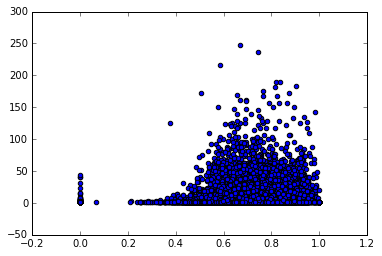

In [59]:
plt.scatter(clean['Gender_Rank'], clean['Total_races'])

In [60]:
clean.describe()

,age,participant_id,runner_rank,status,Age_Rank,Gender_Rank,Total_races
count,9574.000000,9.574000e+03,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000
mean,42.769375,2.786174e+05,69.932166,1.466263,0.728514,0.665302,11.602883
std,9.827515,2.952671e+05,12.998598,0.588958,0.207281,0.174149,19.769396
min,0.000000,4.890000e+02,0.000000,1.000000,0.000000,0.000000,1.000000
25%,35.000000,2.421525e+04,63.010000,1.000000,0.672900,0.600425,1.000000
50%,42.000000,1.849000e+05,69.840000,1.000000,0.761450,0.678550,2.000000
75%,49.000000,4.457022e+05,77.460000,2.000000,0.848900,0.764200,15.000000
max,79.000000,1.180368e+06,100.000000,3.000000,1.000000,1.000000,247.000000


Interesting observation - Very little spread between 25-75% in age of entrants (35-49). Max is 79 and min is ~12 (some cleaning of 0/1 ages may be necessary). 39-44 is the most common ages with nearly 400 in each category. Mid-life crisis???


In [61]:
clean.corr()

,age,participant_id,runner_rank,status,Age_Rank,Gender_Rank,Total_races
age,1.000000,-0.279364,-0.217579,0.070143,-0.013940,-0.009565,-0.004130
participant_id,-0.279364,1.000000,-0.188576,-0.009449,-0.016588,-0.022745,-0.001725
runner_rank,-0.217579,-0.188576,1.000000,-0.189949,0.018092,0.014470,-0.001125
status,0.070143,-0.009449,-0.189949,1.000000,0.010826,0.013578,0.007525
Age_Rank,-0.013940,-0.016588,0.018092,0.010826,1.000000,0.772400,0.180406
Gender_Rank,-0.009565,-0.022745,0.014470,0.013578,0.772400,1.000000,0.162115
Total_races,-0.004130,-0.001725,-0.001125,0.007525,0.180406,0.162115,1.000000


Interesting observation - Appears that runner rank and age have the strongest relationships to the status column. Gender rank and age rank are similar in their relationship. Total races appears to have the weakest relationship for these features.

In [62]:
gender_dummies = pd.get_dummies(clean.gender, prefix='gender')
clean = clean.join(gender_dummies)
clean.head() 
clean.pop('gender')

0       M
1       M
2       M
3       M
4       M
5       F
6       M
7       M
8       M
9       M
10      M
11      M
12      F
13      M
14      M
15      M
16      M
17      M
18      F
19      M
20      M
21      M
22      M
23      M
24      M
25      M
26      M
27      M
28      F
29      M
       ..
9544    M
9545    M
9546    M
9547    M
9548    M
9549    M
9550    M
9551    M
9552    M
9553    F
9554    M
9555    M
9556    M
9557    F
9558    M
9559    M
9560    F
9561    F
9562    M
9563    M
9564    M
9565    M
9566    M
9567    F
9568    M
9569    F
9570    M
9571    F
9572    M
9573    M
Name: gender, dtype: object

In [63]:
clean.corr()

,age,participant_id,runner_rank,status,Age_Rank,Gender_Rank,Total_races,gender_F,gender_M
age,1.000000,-0.279364,-0.217579,0.070143,-0.013940,-0.009565,-0.004130,-0.048496,0.048496
participant_id,-0.279364,1.000000,-0.188576,-0.009449,-0.016588,-0.022745,-0.001725,-0.027851,0.027851
runner_rank,-0.217579,-0.188576,1.000000,-0.189949,0.018092,0.014470,-0.001125,0.191374,-0.191374
status,0.070143,-0.009449,-0.189949,1.000000,0.010826,0.013578,0.007525,-0.002032,0.002032
Age_Rank,-0.013940,-0.016588,0.018092,0.010826,1.000000,0.772400,0.180406,-0.006912,0.006912
Gender_Rank,-0.009565,-0.022745,0.014470,0.013578,0.772400,1.000000,0.162115,-0.011807,0.011807
Total_races,-0.004130,-0.001725,-0.001125,0.007525,0.180406,0.162115,1.000000,0.007073,-0.007073
gender_F,-0.048496,-0.027851,0.191374,-0.002032,-0.006912,-0.011807,0.007073,1.000000,-1.000000
gender_M,0.048496,0.027851,-0.191374,0.002032,0.006912,0.011807,-0.007073,-1.000000,1.000000


Once adding gender dummies, it appears that gender in and of itself may not be a great predictor of race status. Appears to be ~75% male and 25% female particitation in these races.

In [64]:
y = clean.pop('status')
X = clean

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [88]:
model = LR()
model.fit_transform(X_train, y_train)

/Users/stef/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 46.  ,  73.38],
       [ 47.  ,  73.42],
       [ 36.  ,  63.14],
       ..., 
       [ 59.  ,  75.74],
       [ 34.  ,  58.18],
       [ 41.  ,  95.65]])

In [89]:
predicted = model.predict_proba(X_test)

In [90]:
log_loss(y_test, predicted)

0.81691452266512976

In [91]:
model2 = RFC()
model2.fit(X_train, y_train)
predicted2 = model2.predict_proba(X_test)
log_loss(y_test, predicted2)

2.0259915391990706

In [92]:
model3 = GBC(loss='deviance', learning_rate=0.01, \
        n_estimators=4700, subsample=0.75, criterion='friedman_mse')
model3.fit_transform(X_train, y_train)

/Users/stef/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  1.00650000e+04,   7.33800000e+01,   7.29400000e-01,
          6.97000000e-01],
       [  2.85200000e+04,   7.34200000e+01,   6.89500000e-01,
          6.41400000e-01],
       [  2.36479000e+05,   6.31400000e+01,   5.91200000e-01,
          5.73100000e-01],
       ..., 
       [  7.22626000e+05,   7.57400000e+01,   6.91500000e-01,
          5.94000000e-01],
       [  7.28150000e+05,   5.81800000e+01,   7.42000000e-01,
          6.87800000e-01],
       [  3.95114000e+05,   9.56500000e+01,   6.69900000e-01,
          5.51900000e-01]])

In [93]:
predictions = model3.predict_proba(X_test)

In [94]:
log_loss(y_test, predictions)

0.79572770724168207